In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import hmean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, auc

In [8]:
#　データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [3]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

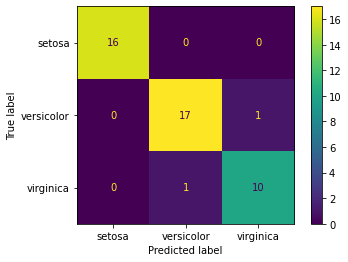

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [6]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Accuracy 正解率

In [11]:
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

In [14]:
accuracy_score(y_true, y_pred)

0.5

## Precision 適合率 TP/(TP+FP)

In [16]:
precision_score(y_true, y_pred)

0.6

## Recall 再現率 TP/(TP+FN)

In [19]:
recall_score(y_true, y_pred)

0.6

## Specificity 特異度 TN/(TN+TP)

In [22]:
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス評価におけるPrecision

In [23]:
#　データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# average=None
print(precision_score(y_test, y_pred, average=None))
# average=macro
print(precision_score(y_test, y_pred, average='macro'))
# average=micro
print(precision_score(y_test, y_pred, average='micro'))
print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


In [26]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Precision Recall Curve

In [41]:
df = pd.read_csv('heart_preprocessed.csv')
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [44]:
model.classes_

array([0, 1])

In [42]:
# 心臓病でない確率　vs 心臓病である確率
y_pred_proba[:10]

array([[0.49557281, 0.50442719],
       [0.28325102, 0.71674898],
       [0.99733358, 0.00266642],
       [0.06907229, 0.93092771],
       [0.4793277 , 0.5206723 ],
       [0.99002568, 0.00997432],
       [0.66307307, 0.33692693],
       [0.79308362, 0.20691638],
       [0.30219419, 0.69780581],
       [0.30219419, 0.69780581]])

In [45]:
y_test

993    0
859    0
298    0
553    1
672    1
      ..
167    0
998    1
984    0
491    0
10     1
Name: target, Length: 300, dtype: int64

In [40]:
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,0,1,1,1,0,0,1,0,0,1,0,0,1,0
996,60,125,258,141,2.8,1,0,1,0,0,1,1,0,1,1,1,0,0,1
997,47,110,275,118,1.0,1,0,1,0,0,1,1,0,1,1,1,0,1,0
998,50,110,254,159,0.0,0,1,0,0,0,1,1,0,1,0,0,0,1,0


In [47]:
# 閾値を徐々に上げていくと、precisionの確率が上がりrecallの確率が下がる
precision, recall, threshholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [49]:
precision[:10]

array([0.48666667, 0.48993289, 0.49324324, 0.49491525, 0.49829352,
       0.5       , 0.50171821, 0.50344828, 0.50519031, 0.5087108 ])

In [50]:
recall[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
threshholds[:10]

array([0.00035599, 0.00128916, 0.00156924, 0.00174511, 0.00200705,
       0.00212913, 0.00259684, 0.00266642, 0.00311701, 0.00334743])

Text(0.5, 1.0, 'Precision Recall Curve')

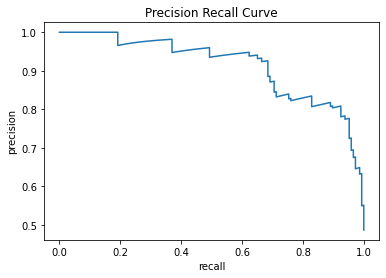

In [54]:
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')

# F値

In [56]:
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]
f1_score(y_true, y_pred)

0.6

In [61]:
# 調和平均ver
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.6

## Threshold vs Precision,Recall,Fscore

In [62]:
f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]

89th threshold(=0.44) is the highest f1 score = 0.86


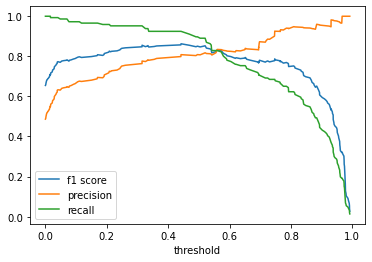

In [72]:
plt.plot(threshholds, f1_scores[:-1], label='f1 score')
plt.plot(threshholds, precision[:-1], label='precision') #TP/(TP+FP)
plt.plot(threshholds, recall[:-1], label='recall') #TP/(TP+FN)
plt.xlabel('threshold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshold(={threshholds[np.argmax(f1_scores)]:.2f}) is the highest f1 score = {np.max(f1_scores):.2f}')

In [67]:
np.argmax(f1_scores)

89

In [68]:
threshholds[np.argmax(f1_scores)]

0.4420725613694442

# ROC

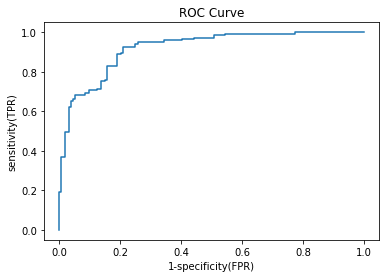

In [79]:
fpr, tpr, threshholds = roc_curve(y_test, y_pred_proba[:, 1])
# 描画
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)') #間違えて陽性と判断した割合
plt.ylabel('sensitivity(TPR)')　#陽性のデータを正しく陽性と予測した割合
plt.title('ROC Curve')
plt.show()

# AUC

In [81]:
auc(fpr, tpr)

0.9196762141967622